# Ford GoBike System Data
## by Mohamed Fatouh

## Investigation Overview

> We start with some cleaning (drop missing values/duplicated values), fix data types and drop useless columns. We focus on trip durations, member's age/gender and user type. From start_time column we make start_day column and from member_birth_year we make member_age column.

## Dataset Overview

> Data consists of info about trips, for February of 2019 taken by ford gobike service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips etc.

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df['start_time'] = pd.to_datetime(df['start_time'])
df.dropna(inplace=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The count of Males, Females and Others

> The most riders are males.

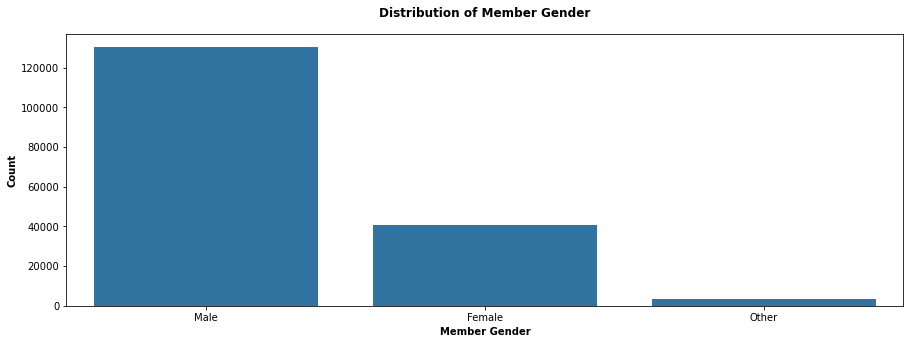

In [22]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[15, 5])
sb.countplot(data=df, x='member_gender', color=base_color, order=df['member_gender'].value_counts().index)
plt.title("Distribution of Member Gender", y = 1.04, weight='bold')
plt.xlabel('Member Gender', weight='bold');
plt.ylabel('Count', weight='bold');

## The relationship between riders' Ages and  their trip duration

> The most riders' ages are between 30 and 40.

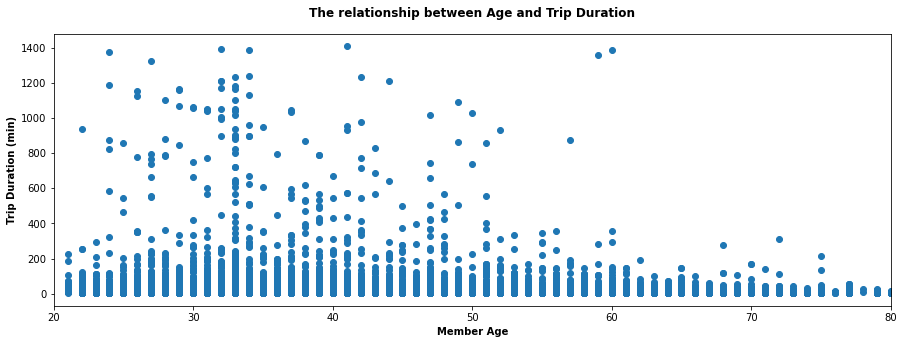

In [23]:
df['member_age'] = 2022 - df['member_birth_year']
df['duration_min'] = df['duration_sec']/60
plt.figure(figsize=[15, 5])
plt.scatter(data=df, x='member_age', y='duration_min');
plt.title('The relationship between Age and Trip Duration', y = 1.04, weight='bold')
plt.xlabel('Member Age', weight='bold');
plt.ylabel('Trip Duration (min)', weight='bold');
plt.xlim(20, 80);

## The relationship between user type, trip duration and user type

> Members between 25 and 30 years old can ride longer especially the customers

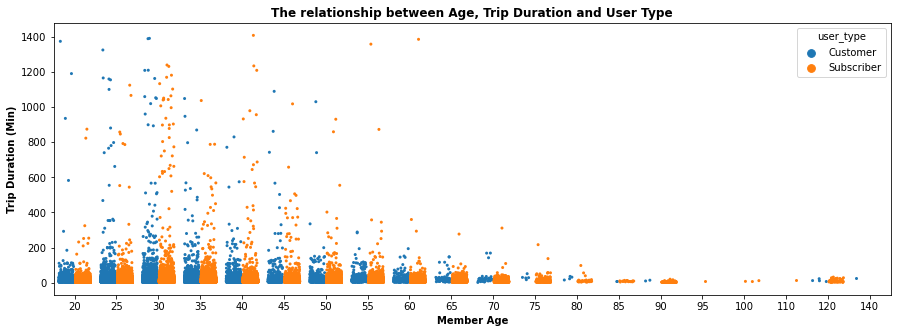

In [24]:
plt.figure(figsize=[15, 5])
df['member_age_v2']=((df['member_age']//5)*5).astype(int)
sb.stripplot(data=df, x= 'member_age_v2', y= 'duration_min', hue= 'user_type', jitter=0.35, dodge=True, size=3)
plt.title('The relationship between Age, Trip Duration and User Type', weight='bold')
plt.xlabel('Member Age', weight='bold');
plt.ylabel('Trip Duration (Min)', weight='bold');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
pip install nbconvert

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt